# PyTorch DataLoader

In [1]:
import os
import numpy as np
from torch.utils.data import Dataset, DataLoader
import time
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

# Data Loading

In [2]:
class CustomDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.file_list = [f for f in os.listdir(data_dir) if f.startswith("part_")]
        self.labels = np.load(os.path.join(data_dir, "labels.npy"), allow_pickle = True).item()
        
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.data_dir, self.file_list[idx])
        image = np.load(file_path)
        label = self.labels[self.file_list[idx]]
        return image, label

In [3]:
data_dir = "data/train_small_npy"

dataset = CustomDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=48, shuffle=True, num_workers=8)

In [5]:
#For time measuring
num_epochs = 5

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in dataloader:
        
        #For comparison, transformed to numpy
        images = images.numpy()
        labels = labels.numpy()
        pass
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 36.65701079368591 seconds.
Epoch 2 done in 42.82759499549866 seconds.
Epoch 3 done in 24.828343629837036 seconds.
Epoch 4 done in 25.591897010803223 seconds.
Epoch 5 done in 29.06279683113098 seconds.
Total time taken: 158.968914270401 seconds
Total time per epoch: 31.7937828540802 seconds


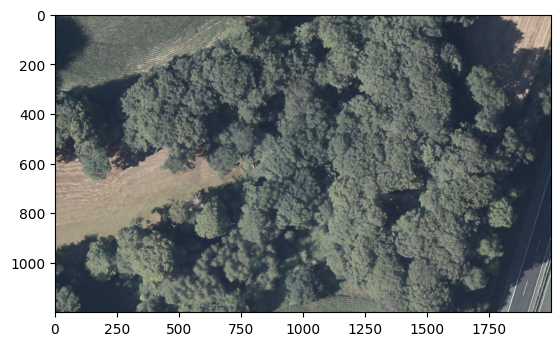

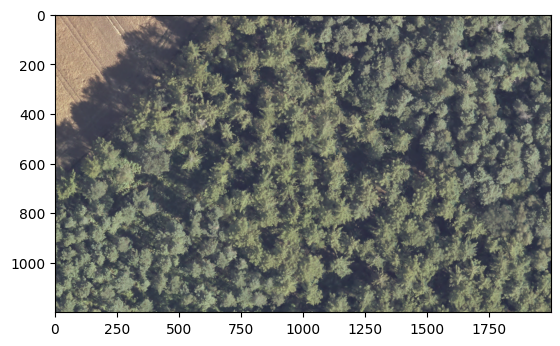

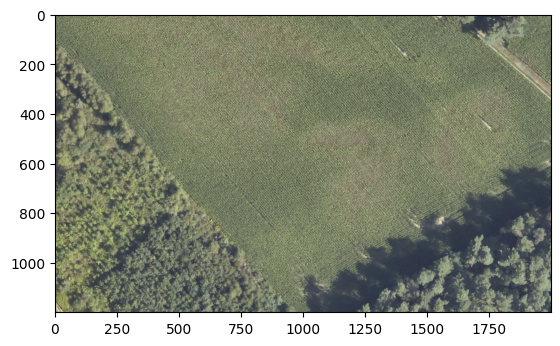

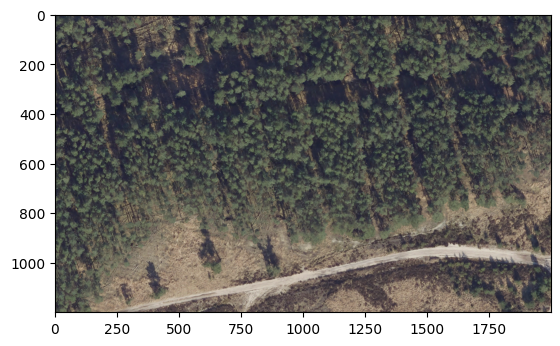

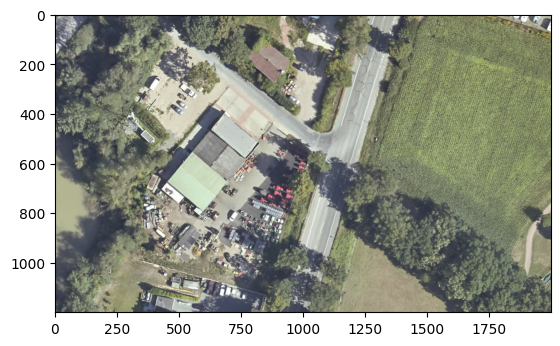

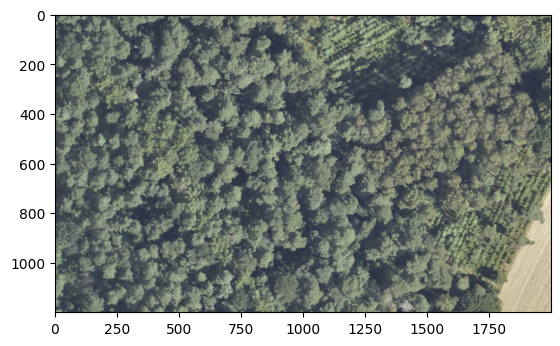

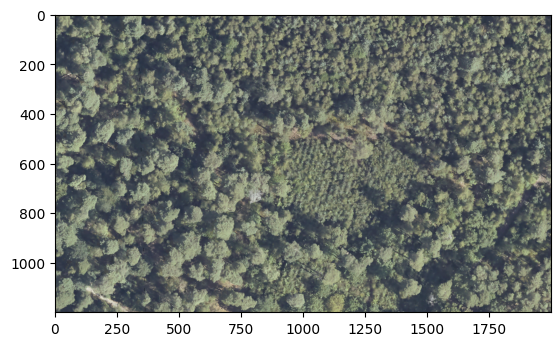

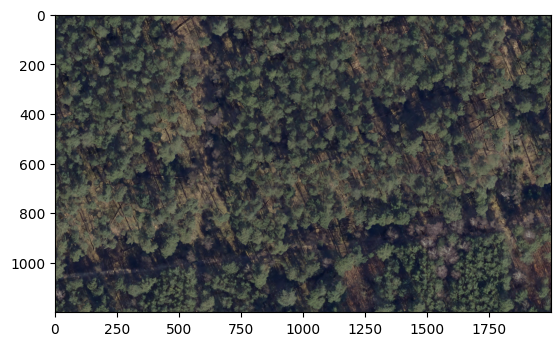

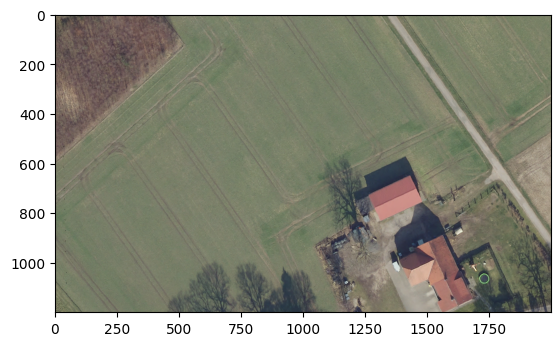

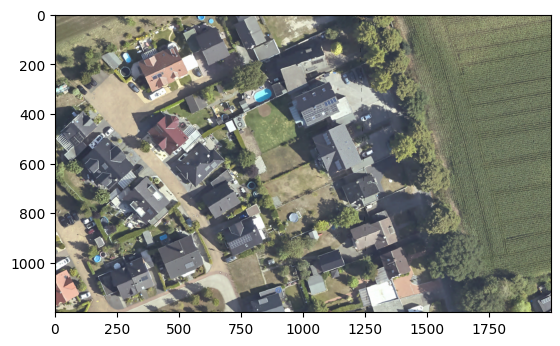

Epoch 1 done.
Total time taken: 41.799686431884766 seconds
Total time per epoch: 41.799686431884766 seconds


In [6]:
# For validation, that Images are indeed loaded
num_epochs = 1
i = 0
start_time = time.time()
for epoch in range(num_epochs):
    for images, labels in dataloader:
        
        # For comparison, transformed to numpy
        images = images.numpy()
        labels = labels.numpy()
        
        # Display the first image for each batch
        if i < 10:
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
        i = i+1
        pass
    print(f"Epoch {epoch+1} done.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

# Data Preprocessing

In [7]:
#For time measuring
num_epochs = 5

custom_transform = transforms.Compose([
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(90),
    transforms.RandomCrop((500, 500))
])

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in dataloader:
        
        transformed_images = torch.stack([custom_transform(image)/255.0 for image in images])
        
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 301.88148498535156 seconds.
Epoch 2 done in 317.6417906284332 seconds.
Epoch 3 done in 318.1397125720978 seconds.
Epoch 4 done in 319.33896827697754 seconds.
Epoch 5 done in 314.21314907073975 seconds.
Total time taken: 1571.2171986103058 seconds
Total time per epoch: 314.24343972206117 seconds


Original Image


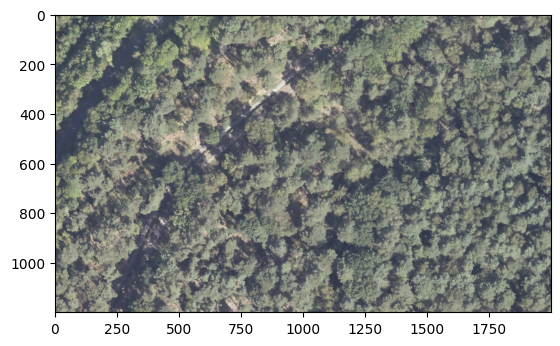

Transformed Image


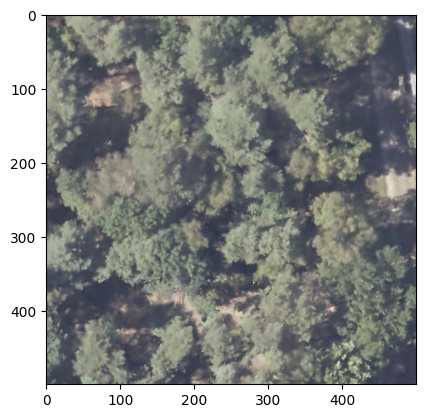

Original Image


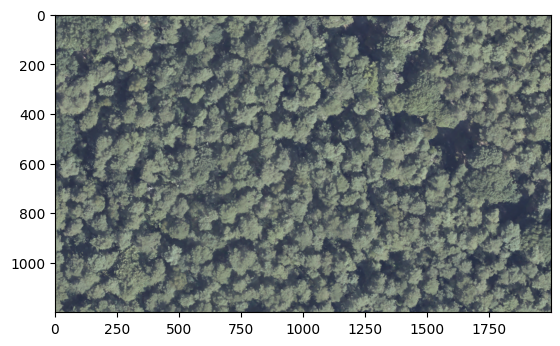

Transformed Image


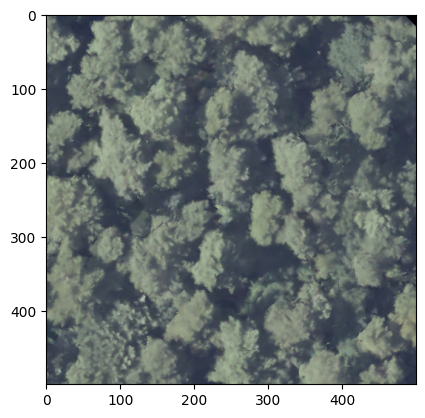

Original Image


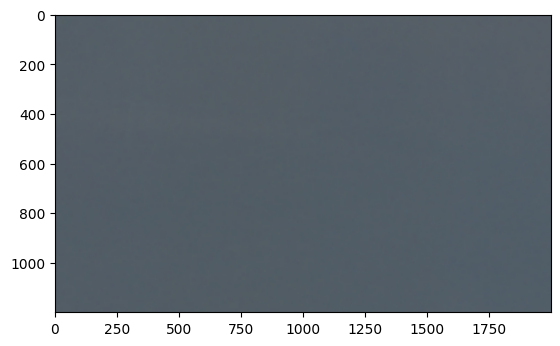

Transformed Image


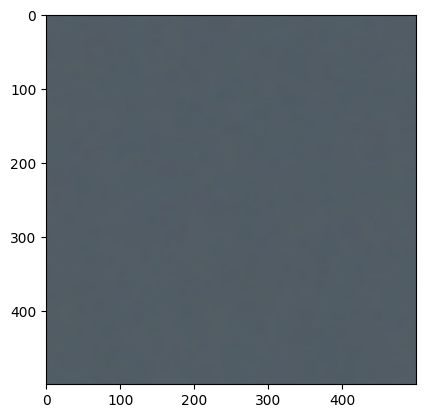

Original Image


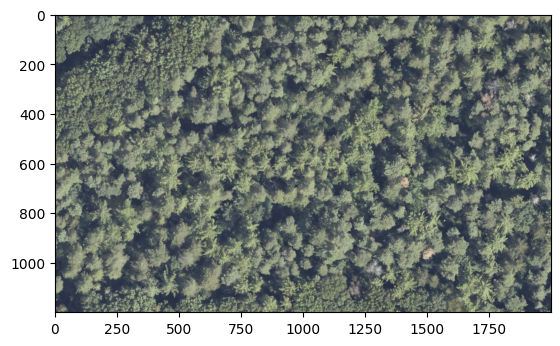

Transformed Image


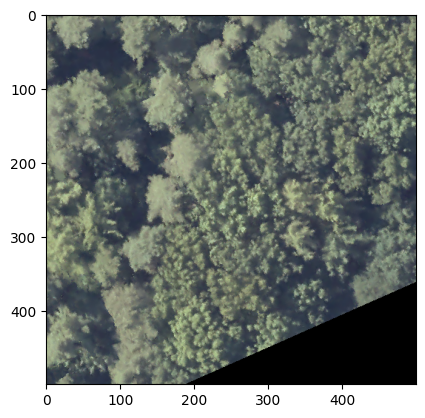

Original Image


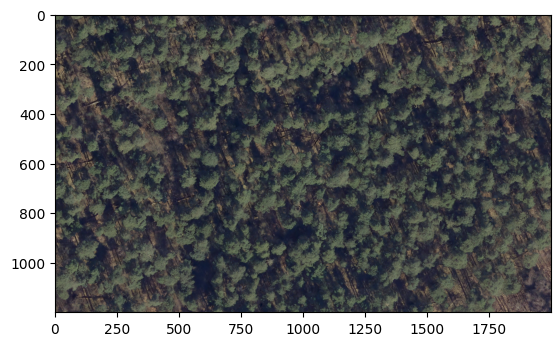

Transformed Image


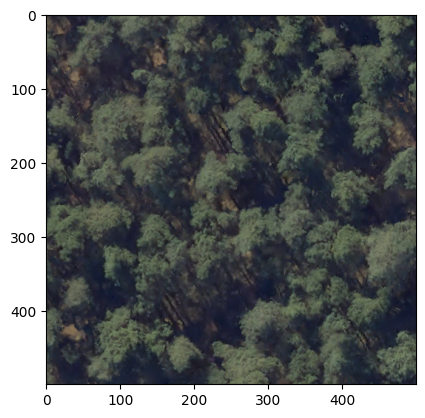

Epoch 1 done in 32.17943358421326 seconds.
Total time taken: 32.179919958114624 seconds
Total time per epoch: 32.179919958114624 seconds


In [8]:
#For validation
num_epochs = 1
i = 0

custom_transform = transforms.Compose([
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(90),
    transforms.RandomCrop((500, 500))
])

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in dataloader:

        if i < 5:
            print("Original Image")
            single_image = images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
            
            transformed_images = torch.stack([custom_transform(image)/255.0 for image in images])
    
            print("Transformed Image")
            single_image = transformed_images[0]
            plt.imshow(np.transpose(single_image, (1, 2, 0)))
            plt.show()
        i = i+1
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

# Machine Learning

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 125 * 125, 200)
        self.fc2 = nn.Linear(200, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 32 * 125 * 125)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Model()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
#For time measuring
num_epochs = 5

custom_transform = transforms.Compose([
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(90),
    transforms.RandomCrop((500, 500))
])

start_time = time.time()
for epoch in range(num_epochs):
    epoch_start = time.time()
    for images, labels in dataloader:
        
        transformed_images = torch.stack([custom_transform(image)/255.0 for image in images])
        
        outputs = model(transformed_images)
        labels = labels.view(-1, 1).float()
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    epoch_end = time.time()
    epoch_time = epoch_end - epoch_start
    print(f"Epoch {epoch+1} done in {epoch_time} seconds.")
end_time = time.time()

total_time = end_time - start_time

print(f"Total time taken: {total_time} seconds")
print(f"Total time per epoch: {total_time/num_epochs} seconds")

Epoch 1 done in 399.6348295211792 seconds.
Epoch 2 done in 390.8624551296234 seconds.
Epoch 3 done in 371.61923813819885 seconds.
Epoch 4 done in 360.078369140625 seconds.
Epoch 5 done in 361.2522945404053 seconds.
Total time taken: 1883.4481813907623 seconds
Total time per epoch: 376.6896362781525 seconds


In [11]:
#Depict true and predicted labels for upper left corner
test_images_list = []
true_labels_list = []
labels = np.load("data/train_small_npy/labels.npy", allow_pickle = True).item()

custom_transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.from_numpy(x).float()),
    transforms.RandomVerticalFlip(0.5),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(90),
    transforms.RandomCrop((500, 500))
])

for i in range(3):
    for j in range(3):
        image = np.load(f"data/train_small_npy/part_{i}_{j}.npy")
        test_images_list.append(image)

        true_label = labels[f"part_{i}_{j}.npy"]
        true_labels_list.append(true_label)

test_images = np.stack(test_images_list)
true_labels = np.stack(true_labels_list)

test_images = torch.stack([custom_transform(image)/255.0 for image in test_images])

with torch.no_grad():
    model.eval()
    outputs = model(test_images)
    model.train()

for i in range(len(test_images)):
    predicted_label = outputs[i].item()
    true_label = true_labels[i].item()

    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

True Label: 32.300029075730365, Predicted Label: 47.846954345703125
True Label: 48.703060020484344, Predicted Label: 47.961097717285156
True Label: 45.16200319928004, Predicted Label: 46.32053756713867
True Label: 43.05451105177395, Predicted Label: 50.28733825683594
True Label: 50.53783853078554, Predicted Label: 49.045143127441406
True Label: 20.70055566802592, Predicted Label: 46.71662139892578
True Label: 22.437885643530564, Predicted Label: 47.998695373535156
True Label: 57.85933785886005, Predicted Label: 48.69843292236328
True Label: 35.674668388114085, Predicted Label: 46.58357620239258
